In [1]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

In [2]:
#example of using shapefile
shp = shapefile.Reader("../shape/ald2018/alderman")
print([f[0] for f in shp.fields])
#for rec in shp.iterRecords(): print(rec)
print('# shapes: ',len(shp.shapes()))

['DeletionFlag', 'ALD2012', 'ALD', 'COLORCAT', 'ALDERMAN', 'SHAPE_AREA', 'SHAPE_LEN']
# shapes:  15


(342443.0112500042, 441445.02375000715)

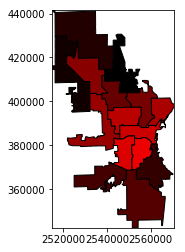

In [3]:
## plot errythang
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
icolor = 1

for shape in list(shp.iterShapes()):
    # define polygon fill color (facecolor) RGB values:
    R = (float(icolor)-1.0)/len(shp.shapes())
    G = 0
    B = 0

    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        polygon = Polygon(shape.points)
        patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
        ax.add_patch(patch)
    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)

            polygon = Polygon(shape.points[i0:i1+1])
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)
    icolor = icolor + 1
plt.xlim(shp.bbox[0],shp.bbox[2])
plt.ylim(shp.bbox[1],shp.bbox[3])

(342443.0112500042, 369083.1899999976)

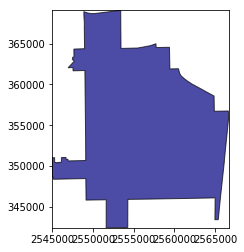

In [4]:
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')

shape_ex = shp.shape(5) # could break if selected shape has multiple polygons. 

# build the polygon from exterior points
polygon = Polygon(shape_ex.points)
patch = PolygonPatch(polygon, facecolor=[0,0,0.5], edgecolor=[0,0,0], alpha=0.7, zorder=2)
ax.add_patch(patch)

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
plt.ylim(shape_ex.bbox[1],shape_ex.bbox[3])